In [4]:
#Libraries that need o be imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report

In [8]:
# matplotlib inline is a magic function that allows one to display matplotlib graphs right next to their code
%matplotlib inline
# setting parameters for graphing format
plt.rc('figure', figsize=(7,4))


In [23]:
#Loading iris dataset
iris = datasets.load_iris()
#Assigning iris dataset to X
X = scale(iris.data)
#Assigning values(for each row) of iris species to y. 0, 1, and 2 represent each of the 3 iris species
y = pd.DataFrame(iris.target)
# Assigning names of columns or variables to variable_names: sepal length, sepal width, petal length, and petal width
variable_names = iris.feature_names
# Printing first 10 rows of the iris dataset
X[0:10,]


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

# Building and Running K-Means Clustering Model

In [26]:
# Creating a K means model of 3 clusters and assigning it to clustering
clustering = KMeans(n_clusters = 3, random_state = 5)
# Putting iris data (X) into K means model (clustering)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

# Plotting Model Outputs

In [28]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
y.columns = ['Targets']


Text(0.5, 1.0, 'K-Means Classification')

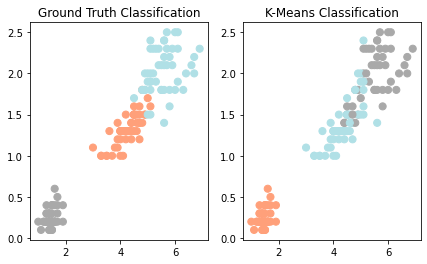

In [34]:
#Setting color theme for scatter plot
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])
# Subplot has 1 row and 2 columns (regular scatter plot with color scheme based on actual species: determined by iris.target)
plt.subplot(1,2,1)
plt.scatter(x = iris_df.Petal_Length, y = iris_df.Petal_Width, c = color_theme[iris.target], s = 50)
plt.title('Ground Truth Classification')
# Clustered scatter plot with color scheme based on K-means cluster predicted species 
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

Text(0.5, 1.0, 'K-Means Classification')

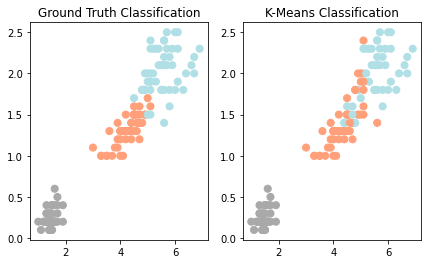

In [36]:
#Kmeans made accurate prediction however miscolored the clusters
#Will fix by making 0(gray) -> 2, 1(orange) -> 0, and 2(blue) -> 1
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)
plt.subplot(1,2,1)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target], s=50)
plt.title('Ground Truth Classification')
plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[relabel], s=50)
plt.title('K-Means Classification')


# Evaluate Clustering Results

In [40]:
#precision: measure of model's relevancy
#recall: measure of model's completeness
# best = 1.00, worse = 0.00
print(classification_report(y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



# Sources
https://www.youtube.com/watch?v=hd1W4CyPX58
https://www.ritchieng.com/machine-learning-iris-dataset/
https://ipython.readthedocs.io/en/stable/interactive/plotting.html